<a href="https://colab.research.google.com/github/MoosaSaadat/handsonml/blob/master/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Download dataset
housing = fetch_california_housing()

# Split in train, validation, test sets
x_train_full, x_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_full, y_train_full)

print(f"Train shape: {x_train.shape}")
print(f"Valid shape: {x_valid.shape}")
print(f"Test shape: {x_test.shape}")

Train shape: (11610, 8)
Valid shape: (3870, 8)
Test shape: (5160, 8)


In [11]:
# transform data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [21]:
# Create Model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam")

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 821
Trainable params: 821
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Train Model with Early Stopping
es_cb = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_valid, y_valid),
                    callbacks=es_cb)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1924 - val_loss: 0.5125
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4290 - val_loss: 0.4142
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3789 - val_loss: 0.3842
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3629 - val_loss: 0.3923
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3538 - val_loss: 0.3666
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3448 - val_loss: 0.3698
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3382 - val_loss: 0.3528
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3323 - val_loss: 0.3606
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3266 - val_loss: 0.3417
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3218 - val_lo

In [23]:
# Evaluate Model
loss = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss*100:.2f}")

Loss: 29.69


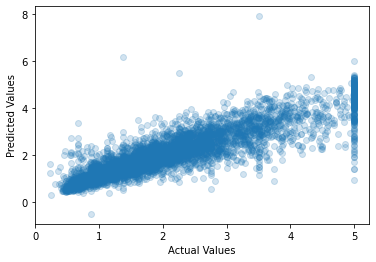

In [56]:
# Make predictions
preds = model.predict(x_test).flatten()

plt.scatter(y_test, preds, alpha=0.2)
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.show()